In [2]:
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch

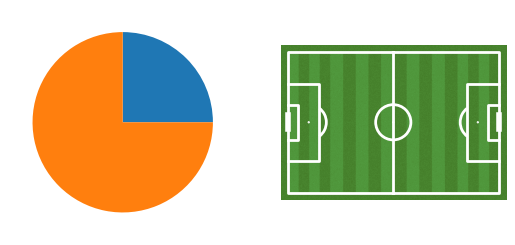

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)
pitch = Pitch()
# specifying figure size (width, height)
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
# fig, ax = pitch.draw(figsize=(8, 4))
pie = axs[0].pie(x=[5, 15])
pitch.draw(ax=axs[1])

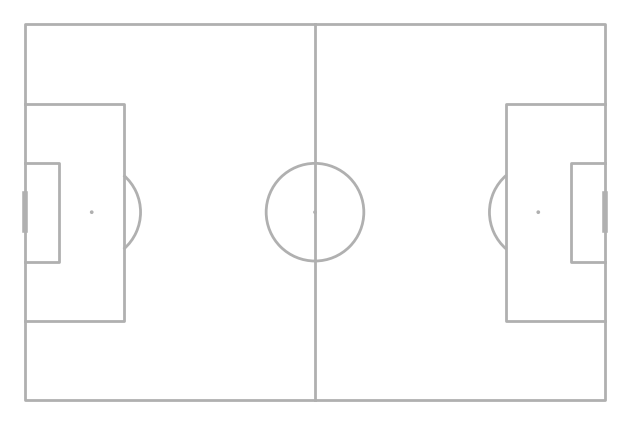

In [8]:
pitch = Pitch(pitch_type='opta')  # example plotting an Opta/ Stats Perform pitch
fig, ax = pitch.draw()

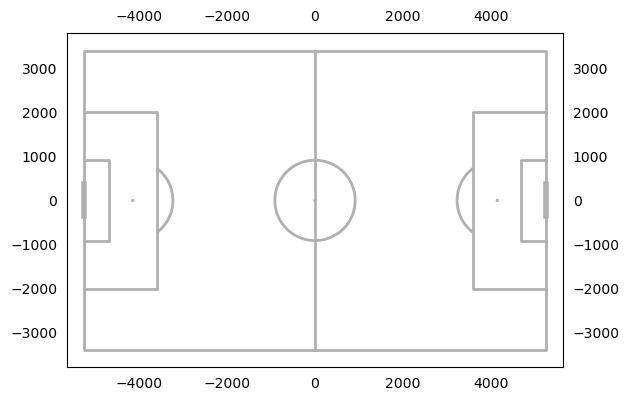

In [9]:
pitch = Pitch(pitch_type='tracab',  # example plotting a tracab pitch
              pitch_length=105, pitch_width=68,
              axis=True, label=True)  # showing axis labels is optional
fig, ax = pitch.draw()

In [12]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [13]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box", "Miscontrol"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [14]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [15]:
bruno_values =   [0.22, 0.25, 0.30, 2.54, 0.43, 5.60, 4.34, 0.29, 0.69, 5.14, 4.97, 1.10]
bruyne_values =  [0.25, 0.52, 0.37, 3.59, 0.41, 6.36, 5.68, 0.57, 1.23, 4.00, 4.54, 1.39]
erikson_values = [0.13, 0.10, 0.35, 3.08, 0.29, 6.23, 5.08, 0.43, 0.67, 3.07, 1.34, 1.06]

In [17]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

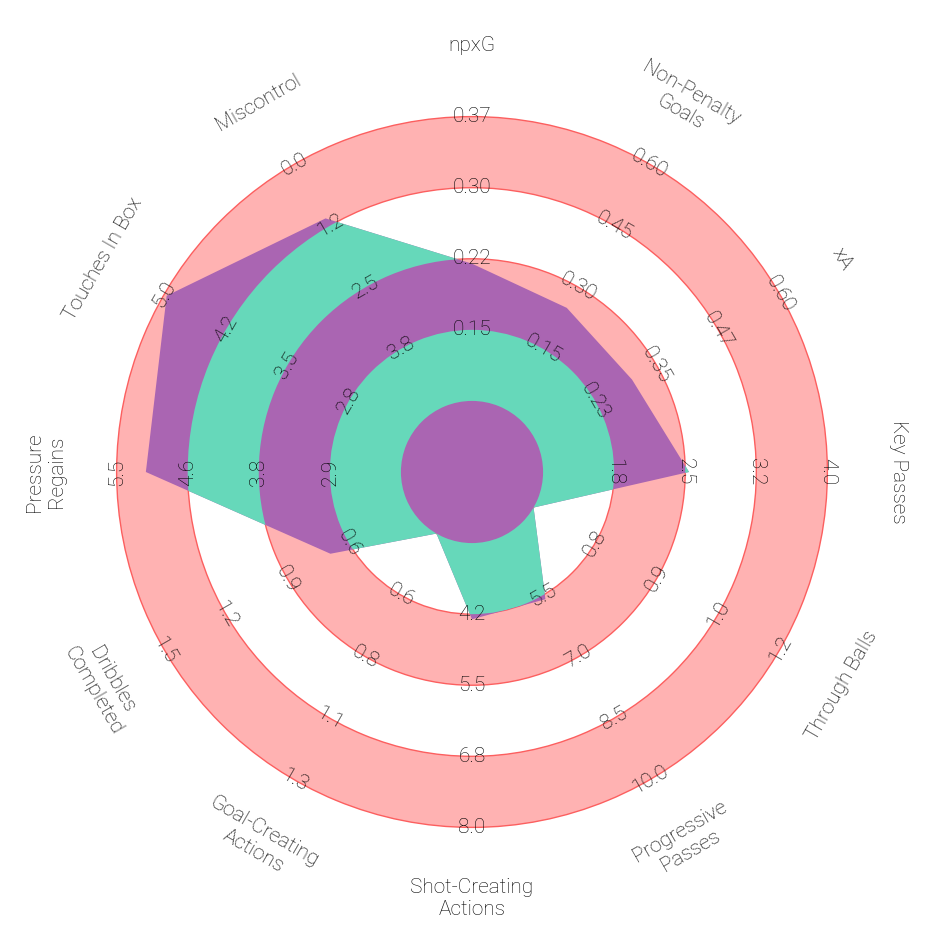

In [18]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

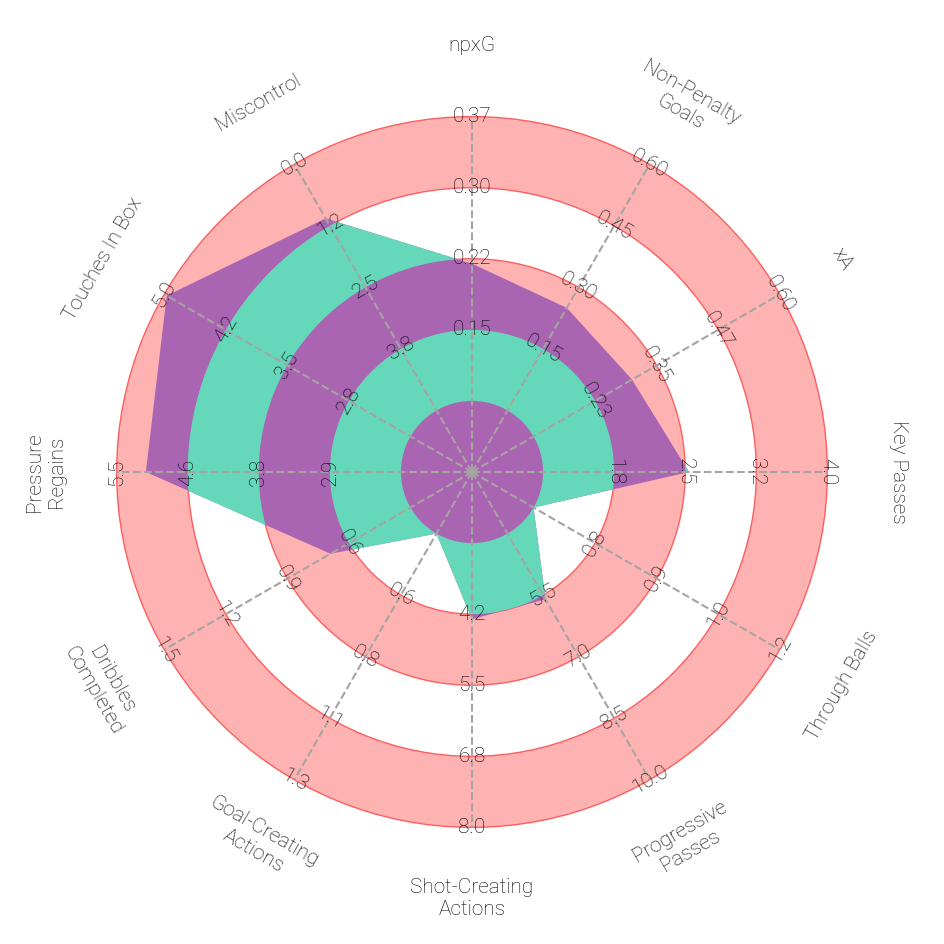

In [19]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, zorder=2.5,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels
lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

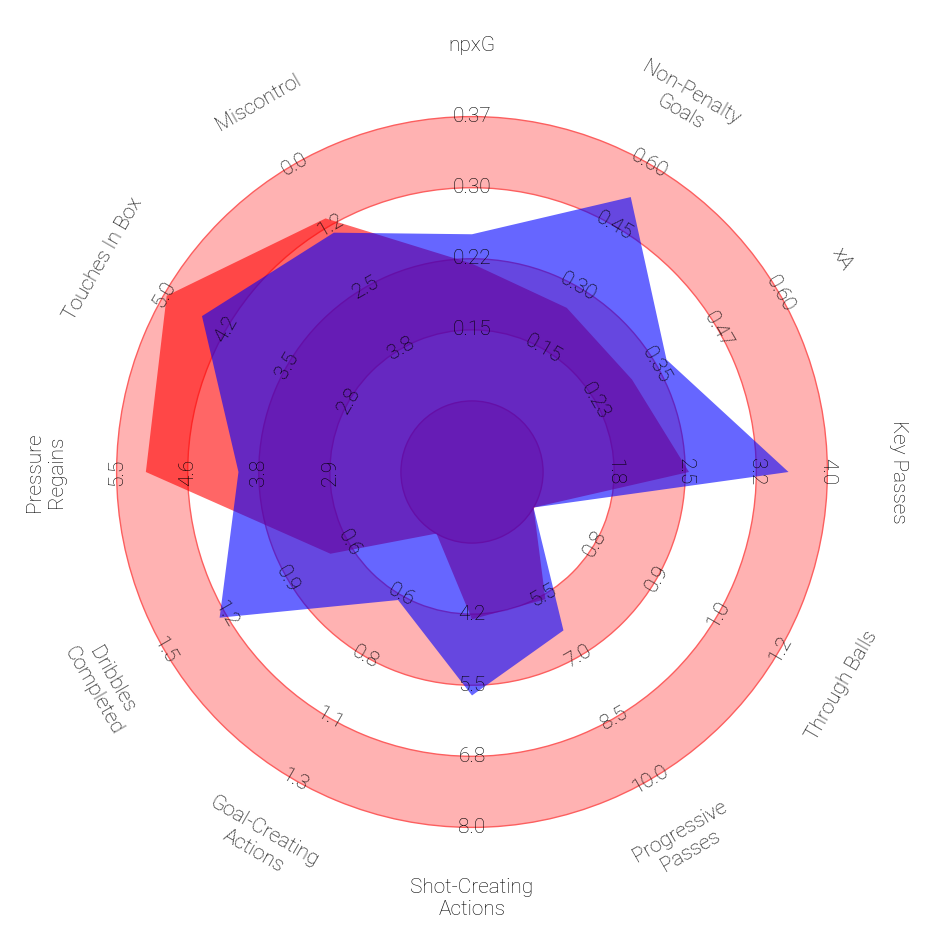

In [21]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=ax,
                                        kwargs_radar={'facecolor': 'red', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': 'blue', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)

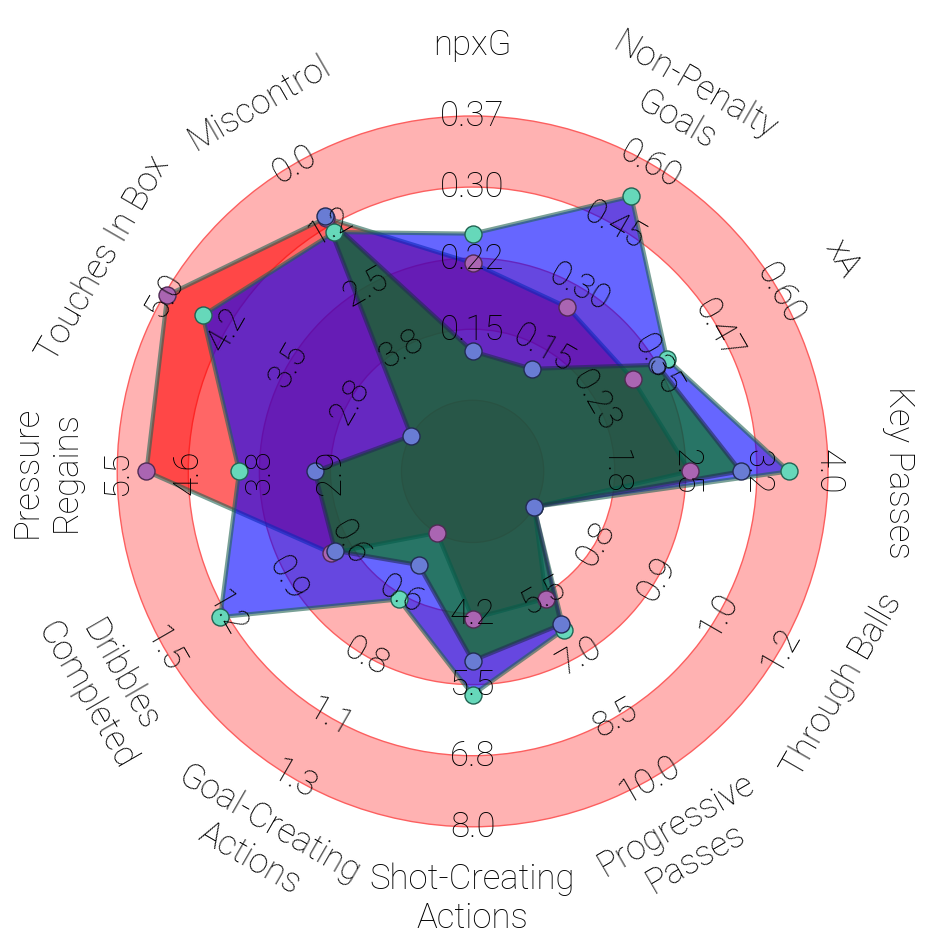

In [24]:
# plot radar
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(bruno_values, ax=ax,
                                           kwargs={'facecolor': 'red',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(bruyne_values, ax=ax,
                                           kwargs={'facecolor': 'blue',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(erikson_values, ax=ax,
                                           kwargs={'facecolor': 'green',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

ax.scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
ax.scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)
ax.scatter(vertices3[:, 0], vertices3[:, 1],
           c='#697cd4', edgecolors='#222b54', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=ax, fontsize=25, fontproperties=robotto_thin.prop)

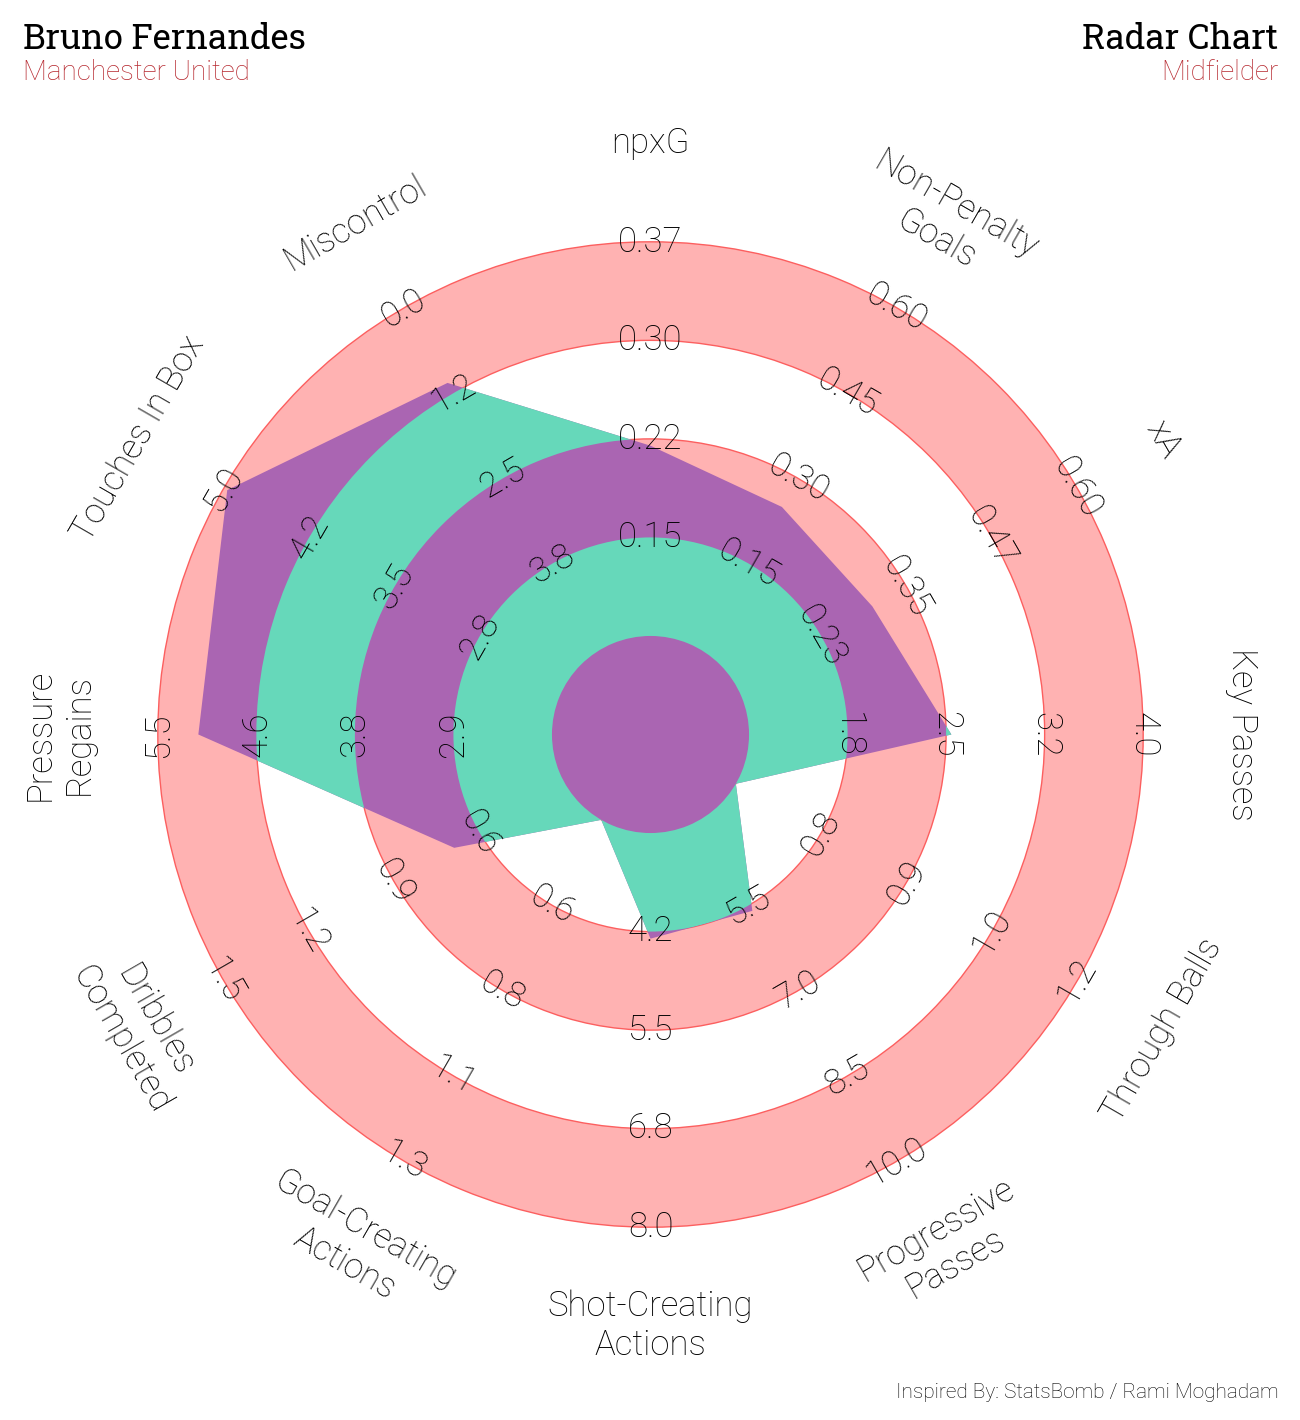

In [25]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#B6282F')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#B6282F')
# sphinx_gallery_thumbnail_path = 'gallery/radar/images/sphx_glr_plot_radar_004.png'

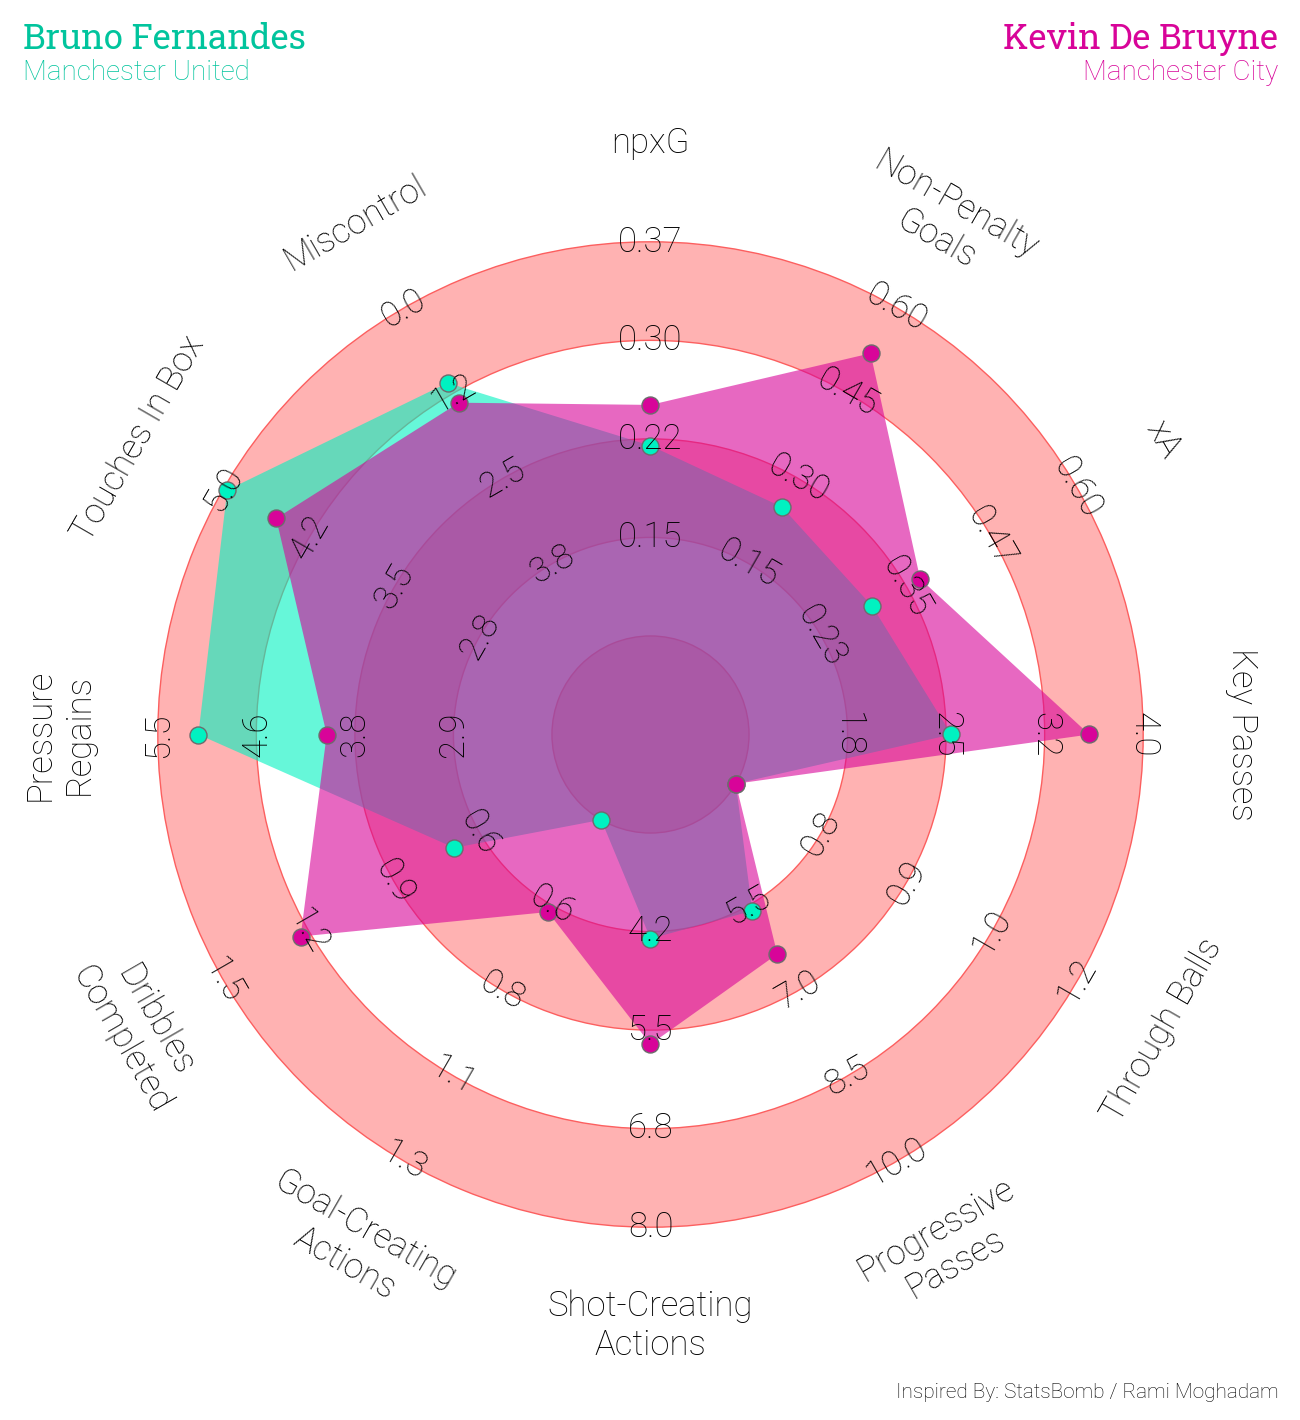

In [26]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Kevin De Bruyne', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

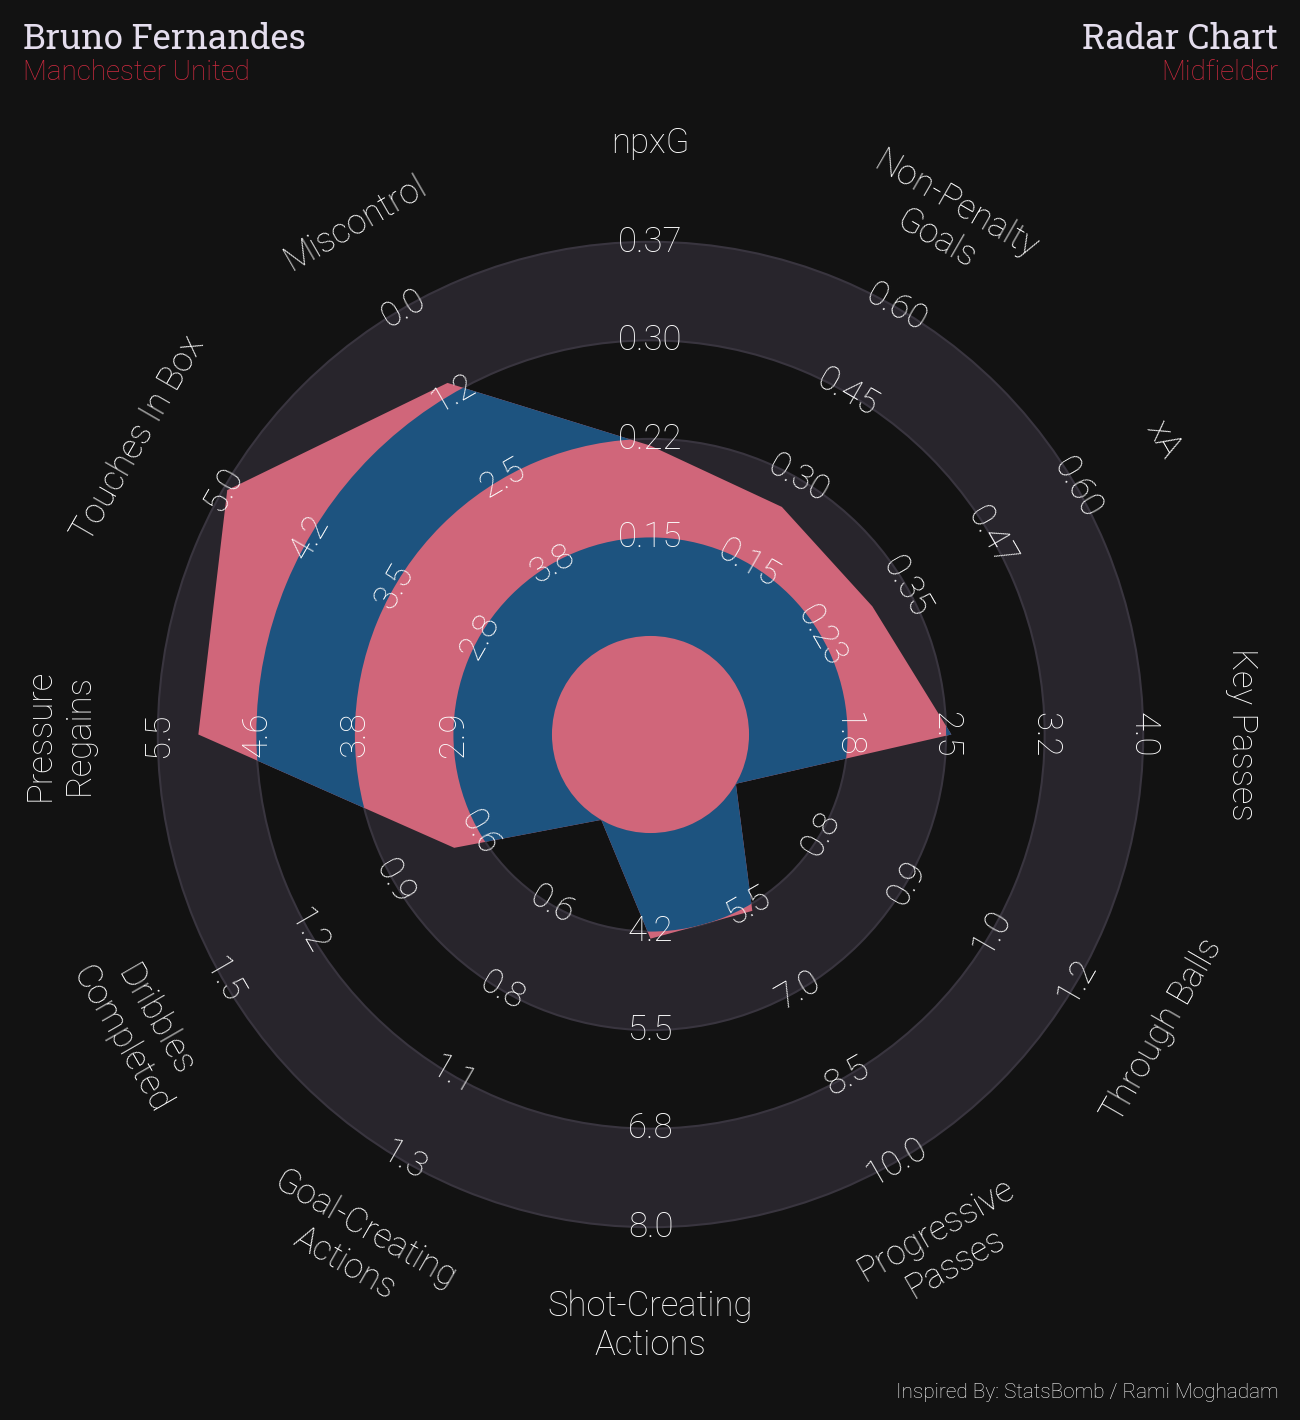

In [27]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam',
                                   color='#fcfcfc', fontproperties=robotto_thin.prop,
                                   fontsize=15, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#cc2a3f')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#cc2a3f')

fig.set_facecolor('#121212')